In [1]:
import pandas as pd
import numpy as np
from nlp import preprocessing as pp

In [7]:
cefr_df = pd.read_csv('data/cefr_df.csv')

In [8]:
cefr_df

,Unnamed: 0,documents,cefr_level,avg_word_len,num_of_words,A1,A2,B1,B2,C1,...,VBG,FW,POS,$,.,NNPS,RBR,:,RBS,WP$
0,0,Sandra picked up the bag of peanuts. It was a ...,A1,4.23,121,76,11,23,6,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"Mommy. I don't feel good.\nWhat's wrong, Josep...",A1,4.57,35,27,5,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Herman didn't like his first name. He had neve...,A1,4.13,106,85,6,7,2,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Dora wanted to buy a card for her mother. Her ...,A1,3.96,105,98,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Sally had a cold. Her nose was red. She pulled...,A1,4.05,112,75,12,18,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,3026,"The classic Sorites, or ‘heap argument’, seeks...",C2,5.03,437,252,53,44,31,0,...,5,0,0,1,0,1,0,0,0,0
3027,3027,In 1932 Marcuse published one of the first rev...,C2,5.41,861,472,84,97,70,6,...,11,0,0,0,0,0,2,0,0,0
3028,3028,Federal officials said Thursday more needs to ...,C2,5.44,392,193,44,69,48,0,...,10,0,0,0,0,0,0,5,0,0
3029,3029,The number of Americans filing new application...,C2,5.32,819,422,93,96,71,2,...,17,0,0,0,0,3,1,0,0,0


In [9]:
cefr_drop = ['documents','cefr_level']
cefr_documents = cefr_df.drop(cefr_drop, axis=1)
cefr_target = cefr_df['cefr_level']
from sklearn.model_selection import train_test_split

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, LSTM, Reshape, Embedding, TextVectorization,Bidirectional,concatenate,Flatten,GRU

In [11]:
label_mapping = {'A1':0,'A2': 1, 'B1': 2, 'B2': 3,'C1':4,'C2':5}
y_train_encoded = np.array([label_mapping[label] for label in cefr_target])

# Convert integer labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train_encoded)

In [12]:
X_train, X_test, y_train_categorical, y_test = train_test_split(cefr_documents, y_train_categorical, test_size=0.2, random_state=42,stratify=y_train_categorical)

In [13]:
X_train.shape

(2424, 45)

In [14]:
y_train_categorical.shape

(2424, 6)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, SpatialDropout1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import numpy as np

model = Sequential([
    Bidirectional(LSTM(16, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(256)),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(6, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='loss', patience=5, min_delta=0.0001, verbose=1)
]
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train_categorical, epochs=100, batch_size=16,
                        validation_split=0.2, callbacks=callbacks)


Epoch 1/100
122/122 [==============================] - 17s 56ms/step - loss: 2.1680 - accuracy: 0.3198 - val_loss: 1.8198 - val_accuracy: 0.3546
Epoch 2/100
122/122 [==============================] - 4s 35ms/step - loss: 1.6593 - accuracy: 0.3703 - val_loss: 1.5872 - val_accuracy: 0.4124
Epoch 3/100
122/122 [==============================] - 4s 33ms/step - loss: 1.5180 - accuracy: 0.3878 - val_loss: 1.4577 - val_accuracy: 0.4144
Epoch 4/100
122/122 [==============================] - 4s 35ms/step - loss: 1.4214 - accuracy: 0.3966 - val_loss: 1.3511 - val_accuracy: 0.4474
Epoch 5/100
122/122 [==============================] - 4s 36ms/step - loss: 1.3194 - accuracy: 0.4312 - val_loss: 1.2509 - val_accuracy: 0.4515
Epoch 6/100
122/122 [==============================] - 4s 36ms/step - loss: 1.2409 - accuracy: 0.4585 - val_loss: 1.1708 - val_accuracy: 0.4701
Epoch 7/100
122/122 [==============================] - 4s 34ms/step - loss: 1.1860 - accuracy: 0.4863 - val_loss: 1.1250 - val_accuracy

In [23]:
_, train_acc = model.evaluate(X_train, y_train_categorical, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

19/19 [==============================] - 0s 16ms/step - loss: 0.5694 - accuracy: 0.7628
Train: 0.766, Test: 0.763


In [24]:
accr = model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19/19 [==============================] - 0s 22ms/step - loss: 0.5694 - accuracy: 0.7628
Test set
  Loss: 0.569
  Accuracy: 0.763


In [25]:
from matplotlib import pyplot as plt

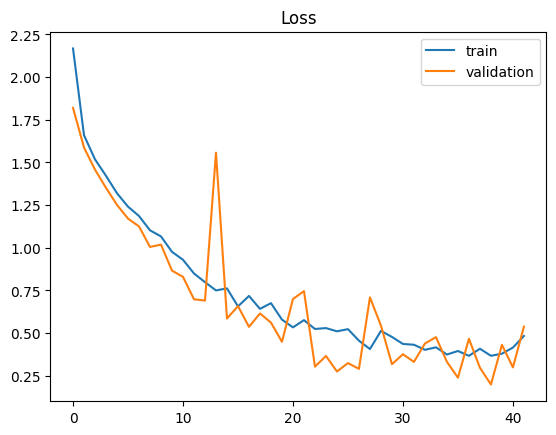

In [26]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

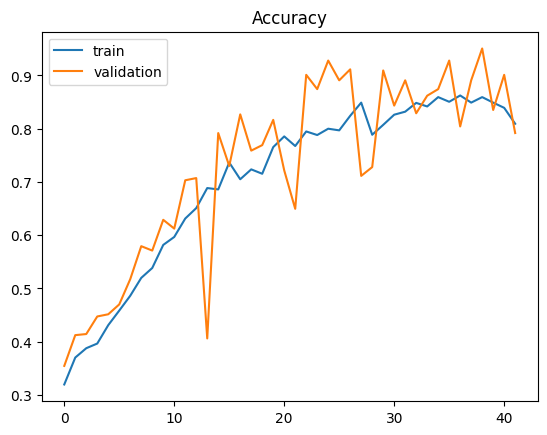

In [27]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print(report)


19/19 [==============================] - 3s 21ms/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        57
           1       0.92      0.84      0.88       122
           2       0.91      0.89      0.90        94
           3       0.81      0.93      0.87       129
           4       0.52      0.76      0.62       110
           5       0.94      0.17      0.29        95

    accuracy                           0.76       607
   macro avg       0.81      0.77      0.73       607
weighted avg       0.81      0.76      0.74       607



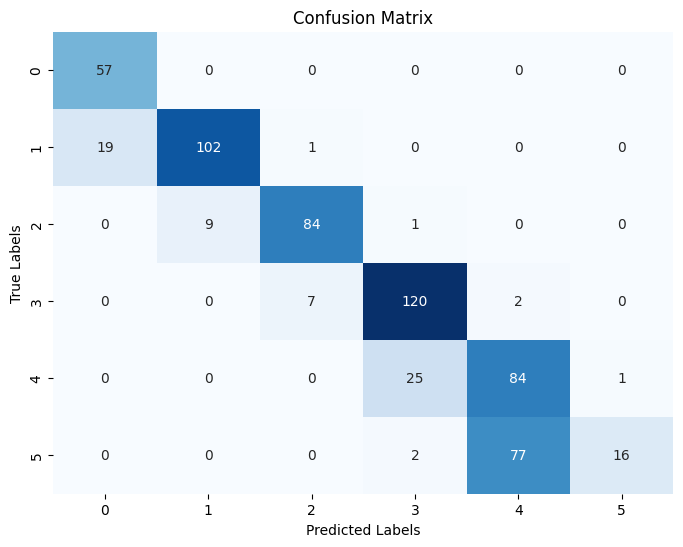

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
